<h1 style='color:red'>Clustering of Countries Assignment

<h3 style='color:green'> Clustering - Machine Learning 1

`Submission Harish Dave`

### Problem Statement
- **Customer: An international non governmental organization (NGO) named HELP.**
- Customer has raised funds of 10 million $.
- Customer wants to use data analysis to decide the best way to allocate the funds.
- Objective is to choose the countries that are in the direst need of aid and maximize the effectiveness of funds.
- Type of Problem: Clustering in an unsupervised learning setup of Machine Learning.
- Question is can we categorise the countries based on socio-economic, health factors covering the overall development?

### Table of Contents
<br>**1. Data Inspection & Handling**
<br>**2. EDA**
    <br> 2.1 Univariate Analysis
    <br> 2.2 Bivariate Analysis
<br> **3. Outlier Analysis**
<br> **4. Preparation for Modeling**
    <br> 4.1 Rescaling
    <br> 4.2 Hopkins Statistics
<br>**5. Clustering - KMeans Algorithm**
    <br> 5.1 Initial K
    <br> 5.2 Elbow Curve & Silhouette Analysis
    <br> 5.3 Iterations with different K
    <br> 5.4 Summary from KMeans
<br>**6. Clustering - Hierarchical Algorithm**
    <br> 6.1 Single vs. Complete Linkage
    <br> 6.2 Iterations with different K
    <br> 6.3 Summary from Hierarchical
<br>**7. Analyse the clusters**
    <br> 7.1 Consolidation
    <br> 7.2 Cluster Profiling
    <br> 7.3 Identify countries in dire need of aid
<br>**8. Visualisations on the clusters**
<br>**9. Conclusions & Recommendations**

<h2 style='color:black'> Step-1: Data Inspection & Handling

In [1]:
# Import necassary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sklearn,  plotly.express as px

In [2]:
# Read in the dataframe & check the shape
dfc = pd.read_csv ('Country-data.csv')
dfc.shape

(167, 10)

<h4 style = 'color:blue'> Observation: Datset contains 167 Countries. There are about 195 countries in the world. So not all countries are in the dataframe.

In [3]:
# Check the data frame
dfc.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
# data dictionary 

# country	Name of the country
# child_mort	Death of children under 5 years of age per 1000 live births
# exports	Exports of goods and services per capita. Given as %age of the GDP per capita
# health	Total health spending per capita. Given as %age of GDP per capita
# imports	Imports of goods and services per capita. Given as %age of the GDP per capita
# Income	Net income per person
# Inflation	The measurement of the annual growth rate of the Total GDP
# life_expec	The average number of years a new born child would live if the current mortality patterns are to remain the same
# total_fer	The number of children that would be born to each woman if the current age-fertility rates remain the same.
# gdpp	The GDP per capita. Calculated as the Total GDP divided by the total population.

In [5]:
# Check the datatype
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<h4 style = 'color:blue'> Observation: It seems like GDP per capita and income have been rounded off to integer which makes sense.<br> <br> Assumption: gdpp and income are in same unit of currency.

In [6]:
# Check for missing values
dfc.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<h4 style = 'color:blue'> Observation: No missing value.

In [7]:
# Check the summary statistics
dfc.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

<h4 style = 'color:blue'> Observation: Some countries have negative inflation, which can be because deflation does occur in some countries

<h4 style = 'color:blue'> Observation: There are clearly outliers in the data. 200% export value, 174% import value, 100% inflation value & some very rich countries.

<h2 style='color:black'> Step-2: EDA

<h3 style='color:black'> Step-2.1: Univariate Analysis

In [8]:
# Function to plot histograms
def Hist_Plotter (df, order_bins = 50):
    plt.style.use('seaborn-darkgrid')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 14
    fig = plt.figure(figsize = (18,12))
    fig.suptitle('Histograms', fontsize=font1)
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, df.columns[1:].shape[0])))
    for ii in enumerate(df.columns[1:]):
        ax1 = fig.add_subplot(3, 3, ii[0]+1)
        plt.subplot(ax1)
        plt.hist(df[ii[1]], bins=order_bins,edgecolor='black', color=next(colors))
        plt.xlabel(ii[1], fontsize=font3)
        #plt.title(ii[1], fontsize=font2)
    plt.show()
    return

# Function to plot scatters
def Scatter_Plotter (df):
    plt.style.use('seaborn')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 14
    fig = plt.figure(figsize = (18,12))
    fig.suptitle('Scatter Plots', fontsize=font1)
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, df.columns[1:].shape[0])))
    for ii in enumerate(df.columns[1:]):
        ax1 = fig.add_subplot(3, 3, ii[0]+1)
        plt.subplot(ax1)
        plt.scatter(df.index, df[ii[1]], color=next(colors), s= 20)
        plt.ylabel(ii[1], fontsize=font3)
    plt.show()
    return

# Function to plot strips
def Strip_Plotter (df):
    plt.style.use('seaborn')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 14
    fig = plt.figure(figsize = (18,12))
    fig.suptitle('Strip Plots', fontsize=font1)
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, df.columns[1:].shape[0])))
    for ii in enumerate(df.columns[1:]):
        ax1 = fig.add_subplot(3, 3, ii[0]+1)
        plt.subplot(ax1)
        sns.stripplot(df[ii[1]], color=next(colors), s= 7)
        plt.xlabel(ii[1], fontsize=font3)
    plt.show()
    return

# Function to plot box
def Box_Plotter (df):
    plt.style.use('seaborn')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 14
    fig = plt.figure(figsize = (18,6))
    #fig.suptitle('Box Plots', fontsize=font1)
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, df.columns[1:].shape[0])))
    for ii in enumerate(df.columns[1:]):
        ax1 = fig.add_subplot(1, 9, ii[0]+1)
        plt.subplot(ax1)
        sns.boxplot(data = df, y=[ii[1]], color=next(colors))
        plt.xlabel(ii[1], fontsize=font3)
    plt.tight_layout()
    plt.show()
    return

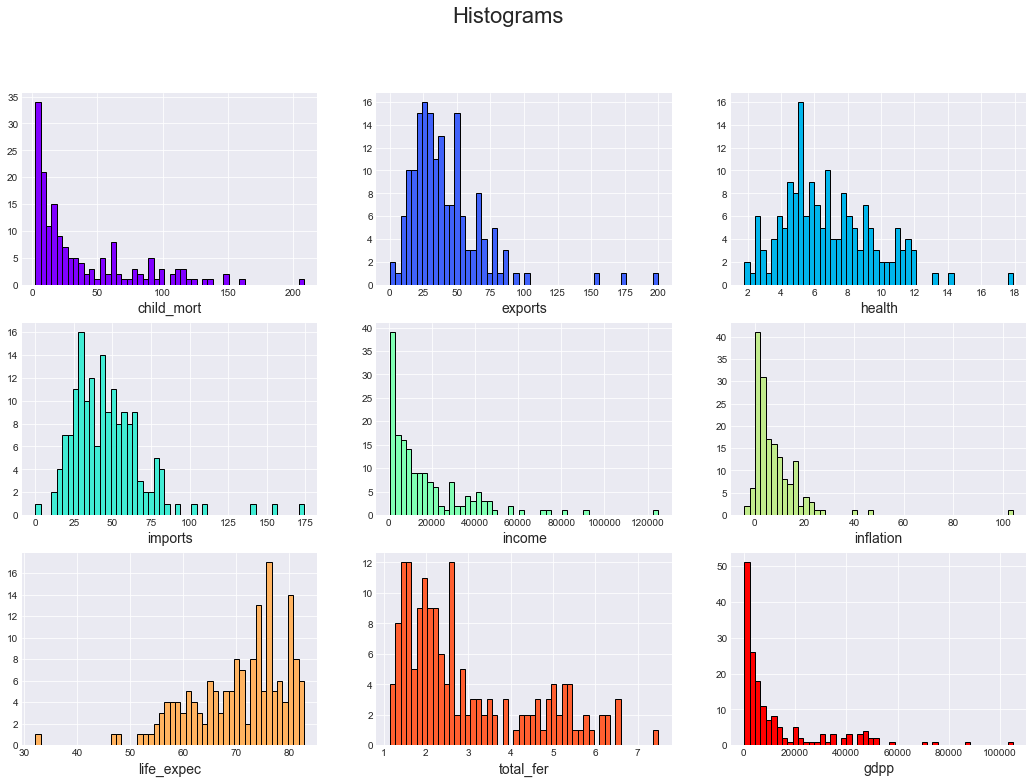

In [9]:
Hist_Plotter(dfc)

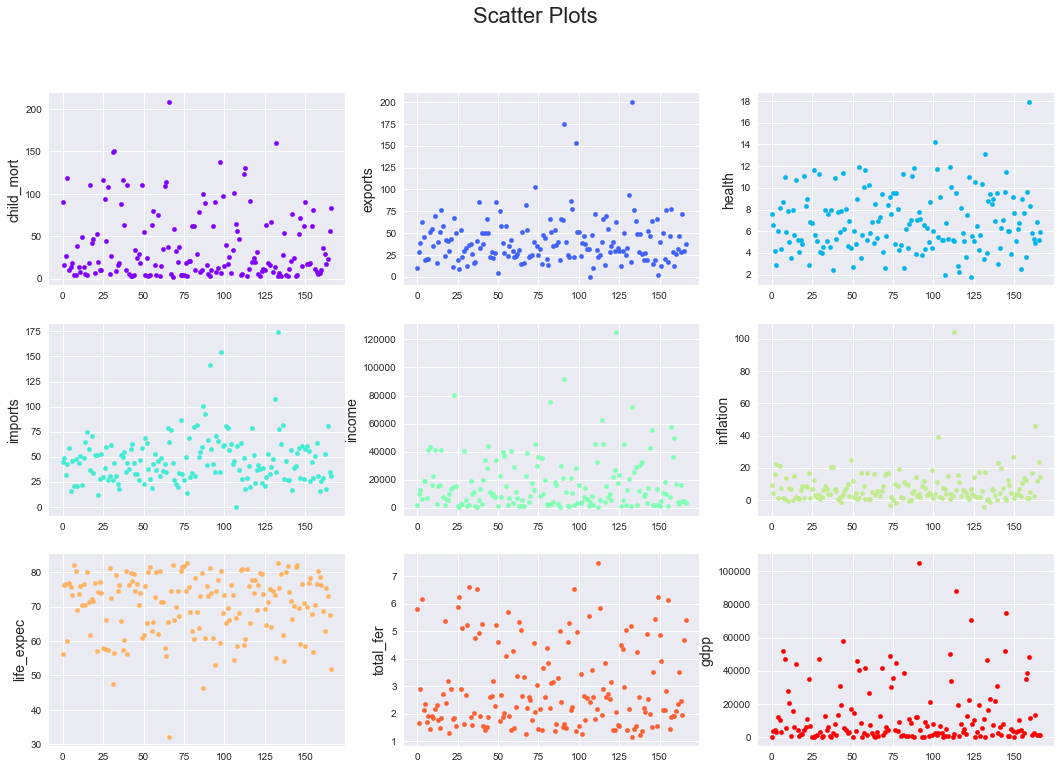

In [10]:
Scatter_Plotter(dfc)

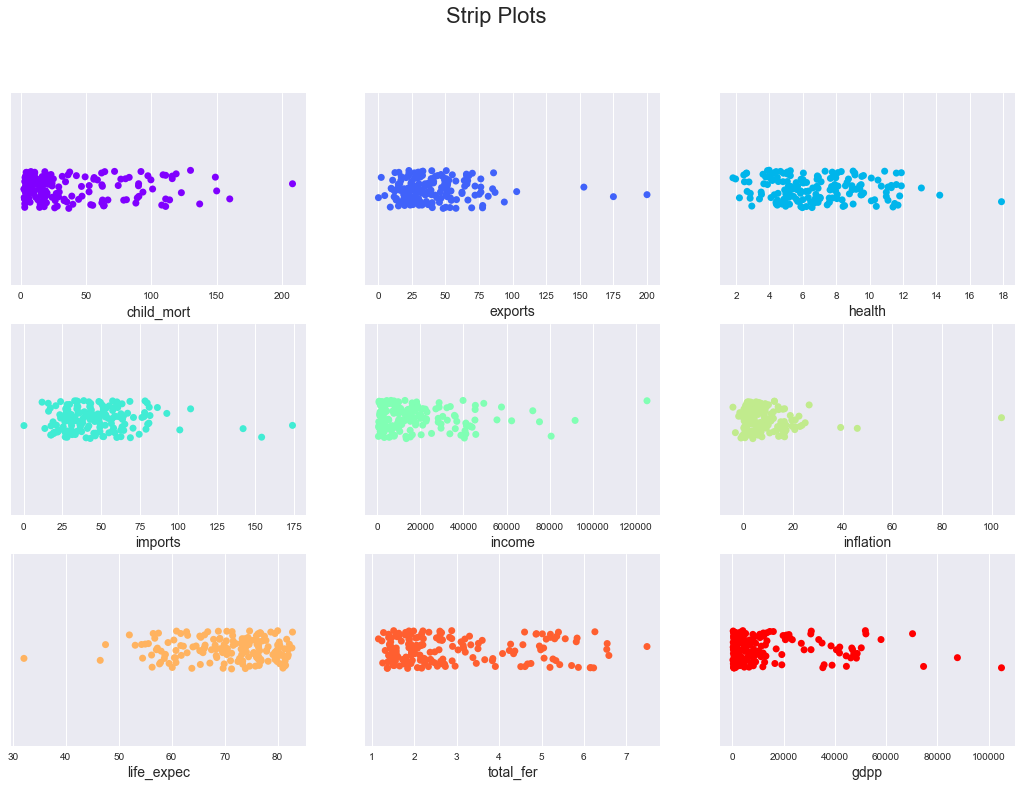

In [11]:
Strip_Plotter(dfc)

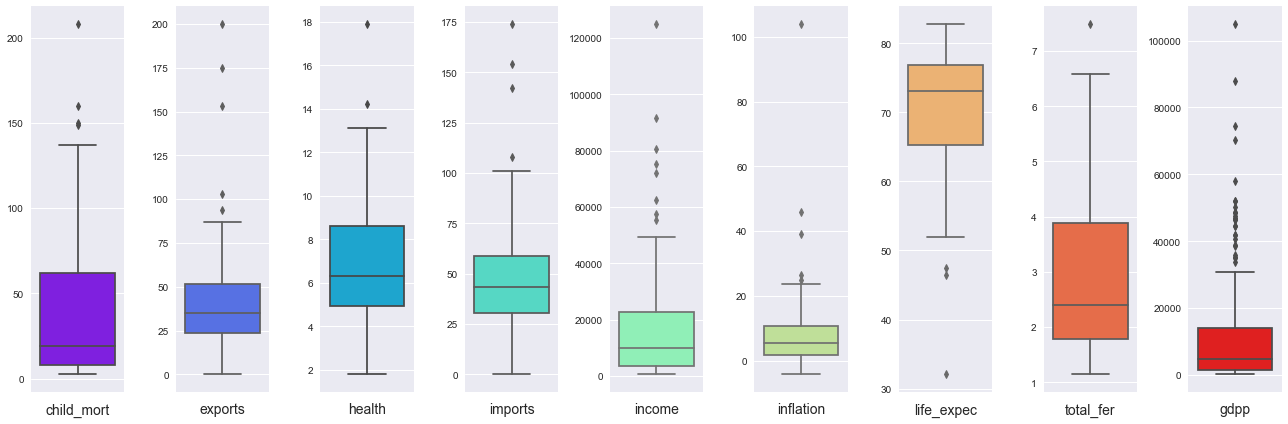

In [12]:
Box_Plotter(dfc)

<h4 style = 'color:blue'> Observations from Univariate Analysis

- **child_mort**: high density below 25 per 1000 births. Most of the countries are below 100. Few between 100 and 150. Above 150 seems to be outliers.
- **exports**: high density below 50% GDP per capita. Rest of them are between 50% to 100% range. Above 100% seems to be outliers.
- **health**: majority of the countries in the range of 4% to 6%. pretty uniform spread from 0% to 12%. Above 12% seems to be outliers.
- **imports**: distribution seems to be similar to exports. high density below 50% GDP per capita. Rest of them are between 50% to 100% range. Above 100% seems to be outliers.
- **income**: distribution seems to be similar to child_mort. high density below 20k. Few between 20k to about 50k. Above 50-55k seems to be outliers.
- **inflation**: most of the countries like in the range 0% to 10%. Few between 10% to 20%. A few below 0% (deflation). 3 countries above 35% seems to be outliers.
- **life_expec**: most are above 70. remaining are between 50 and 70. 3 countries below 50 seems to be outliers.
- **total_fer**: majority of the countries are between 1 and 3. remaining are between 3 to 6. 1 country above 7 seems to be outlier.
- **gdpp**: distribution seems to be similar to income. high density below 20k. Few between 20k to about 50k. Above 50-55k seems to be outliers.

<h4 style = 'color:blue'> Observation: gdpp, income & child_mort have similar trend. These 3 variables should be paid closer attention.

<h4 style = 'color:blue'> Observation: Clearly there are outliers, which can skew the cluster centers. This will be looked into after bivariate analysis.

<h3 style='color:black'> Step-2.2: Bivariate Analysis

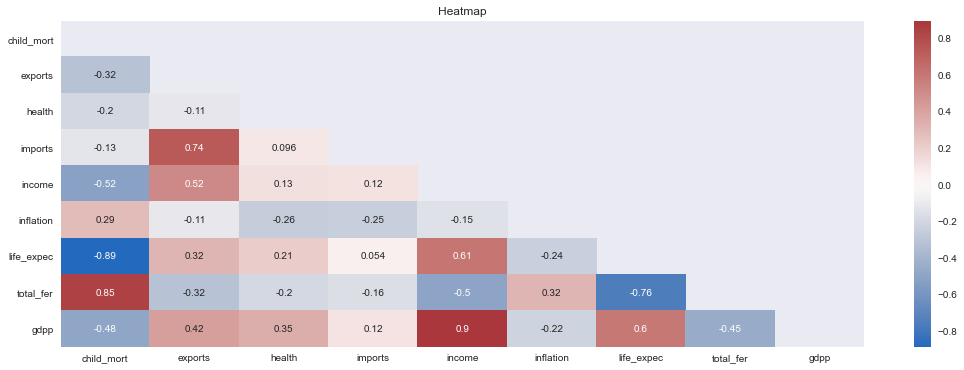

In [13]:
# Heatmap of all the variables
plt.figure(figsize = (18,6))
mask1 = np.zeros_like(dfc.corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(dfc.corr(), mask= mask1, annot=True, cmap= 'vlag')
plt.title('Heatmap')
plt.show()

<h4 style = 'color:blue'> Observation: Top Positive Correlations

- gdpp & income
- imports & exports
- child mortality & number of children that would be born to each woman
- life expectancy & income

<h4 style = 'color:blue'> Observation: Top Negative Correlations

- life expectancy & child mortality
- life expectancy & number of children that would be born to each woman
- child mortality & income

<h4 style = 'color:blue'> Observation: GDP is an key variable. Rest of the variables can be largely grouped as follows

- Economic: income, inflation, import, export
- Health: child_mort, health, total_fer, life_expec

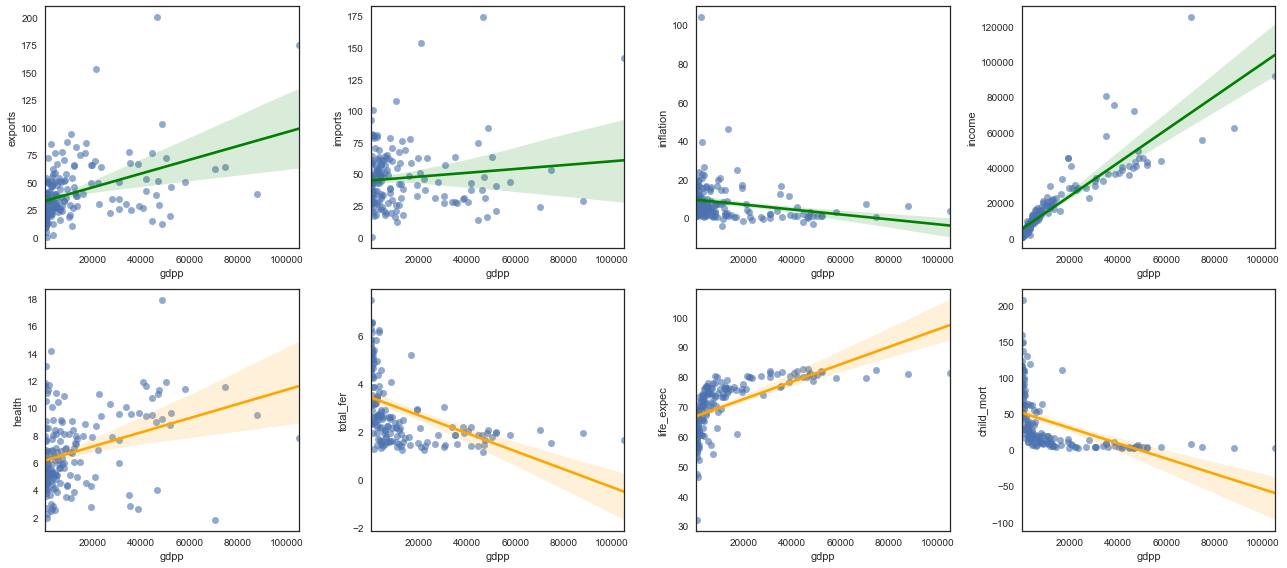

In [14]:
# Regplot of Economic & Health Variables
plt.figure(figsize=[18,8])
plt.style.use('seaborn-white')

plt.subplot(2,4,1)
sns.regplot(data=dfc, x='gdpp', y='exports',scatter_kws={'alpha': 0.6}, line_kws={'color': 'green'})
plt.subplot(2,4,2)
sns.regplot(data=dfc, x='gdpp', y='imports',scatter_kws={'alpha': 0.6}, line_kws={'color': 'green'})
plt.subplot(2,4,3)
sns.regplot(data=dfc, x='gdpp', y='inflation',scatter_kws={'alpha': 0.6}, line_kws={'color': 'green'})
plt.subplot(2,4,4)
sns.regplot(data=dfc, x='gdpp', y='income',scatter_kws={'alpha': 0.6}, line_kws={'color': 'green'})

plt.subplot(2,4,5)
sns.regplot(data=dfc, x='gdpp', y='health',scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})
plt.subplot(2,4,6)
sns.regplot(data=dfc, x='gdpp', y='total_fer',scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})
plt.subplot(2,4,7)
sns.regplot(data=dfc, x='gdpp', y='life_expec',scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})
plt.subplot(2,4,8)
sns.regplot(data=dfc, x='gdpp', y='child_mort',scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})

plt.tight_layout()
plt.show()

<h4 style = 'color:brown'> Insight: Countries with GDP below 20000 are struggling with low life expectancy, high child mortality and thereby higher total_fer.

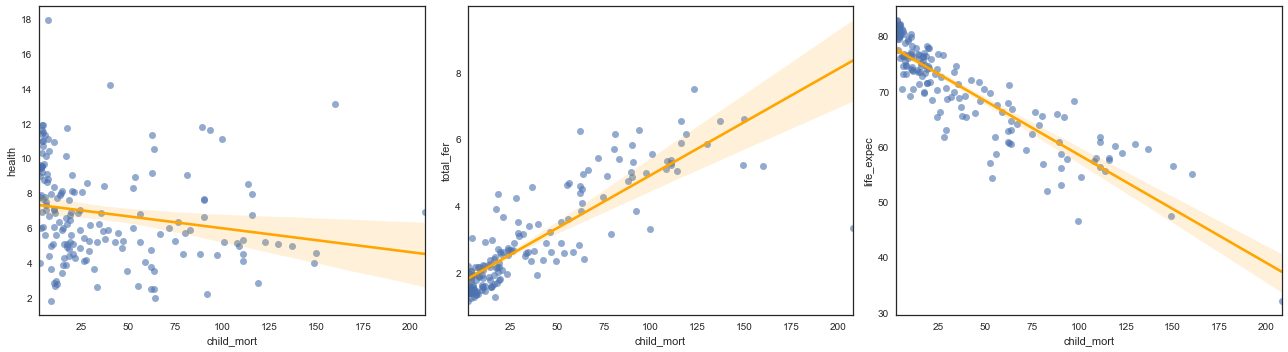

In [15]:
# Regplot of Economic & Health Variables
plt.figure(figsize=[18,5])
plt.style.use('seaborn-white')
plt.subplot(1,3,1)
sns.regplot(data=dfc, x='child_mort', y='health',scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})
plt.subplot(1,3,2)
sns.regplot(data=dfc, x='child_mort', y='total_fer',scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})
plt.subplot(1,3,3)
sns.regplot(data=dfc, x='child_mort', y='life_expec',scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})
plt.tight_layout()
plt.show()

<h4 style = 'color:brown'> Insight: child_mortality could possibly indicate the overall health and life_expectancy of countries.

<h2 style='color:black'> Step-3: Outlier Analysis

In [16]:
# Box Plot of income & gdpp
fig=px.box(dfc,y=['income','gdpp'], hover_name="country", width=900, height=400,
           color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.show()

<h4 style = 'color:blue'> Observation: outlier countries based on income & gdpp seem to be rich countries. These countries posisbly do not need NGO funding.

In [17]:
fig=px.box(dfc,y=['child_mort','inflation', 'life_expec'],hover_name="country", width=900, height=400,
          color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.show()

<h4 style = 'color:blue'> Observation: Outliers in child_mort, inflation and life_expec seems to be countries in need of funds (Haiti, Central African Republic, Nigeria etc). Makes no sense in dropping or upper bound capping

In [18]:
fig=px.box(dfc,y=['exports','imports'], hover_name="country",width=900, height=400,
          color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.show()

<h4 style = 'color:blue'> Observation: outlier countries based on export and imports seems to be rich countries

Let us bin the countries based on gdpp. Countries below 20k and countries above 20k gdpp.

In [19]:
# Based on insight from EDA, let us bin the countries based on GDPP below 20k and above 20k

dfc['gdpp_bin'] = pd.cut(dfc['gdpp'], [0, 20000, 200000], 
                              labels=['0-20k', '20k+'])

In [20]:
# Function to plot swarm plot after binning
def Swarm_Plotter (df):
    plt.style.use('seaborn')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 14
    fig = plt.figure(figsize = (18,12))
    fig.suptitle('Swarm Plots', fontsize=font1)
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, df.columns[1:-1].shape[0])))
    for ii in enumerate(df.columns[1:-1]):
        ax1 = fig.add_subplot(3, 3, ii[0]+1)
        plt.subplot(ax1)
        sns.swarmplot(x=df['gdpp_bin'], y=df[ii[1]])
        plt.xlabel('gdpp_bin', fontsize=11)
    plt.show()
    return

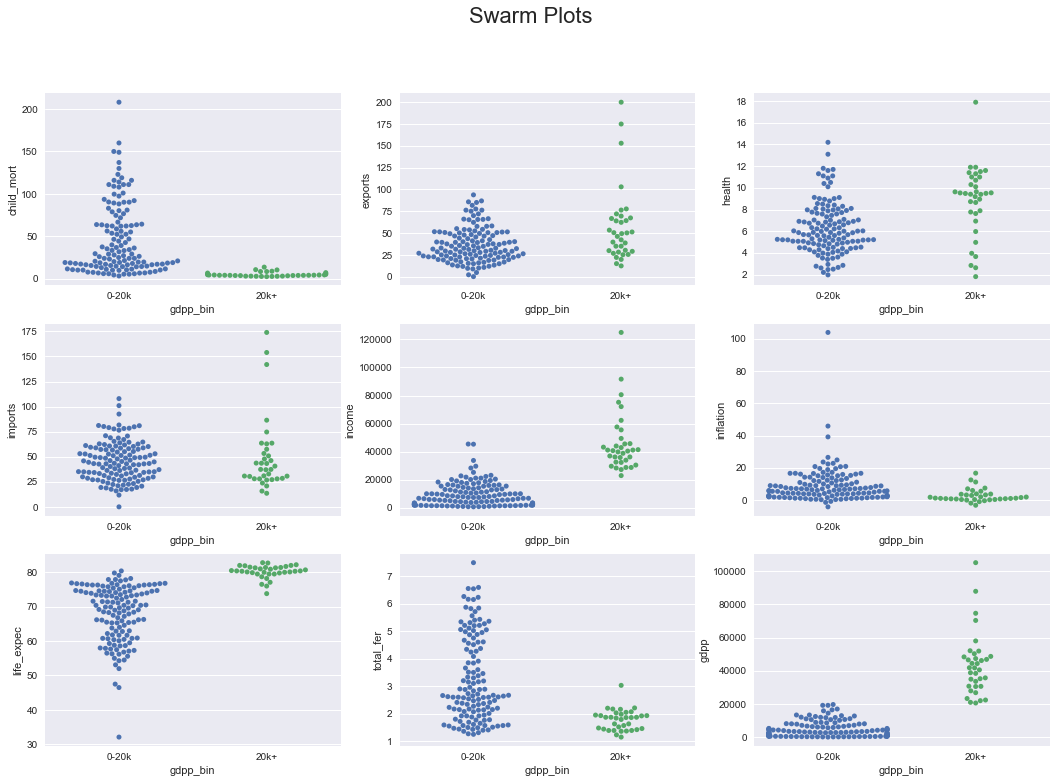

In [21]:
Swarm_Plotter (dfc)

<h4 style = 'color:blue'> Observation: Not justified to drop the Outliers in child_mort, inflation, life_expec, total_fer. Infact these countries should be getting selected.

<h4 style = 'color:blue'> Observation: There are two outliers in income above 40000. But lets keep them.

In [22]:
# Final dataframe after outlier treatment

df_final = dfc[(dfc.gdpp_bin == '0-20k')].copy(deep=True)
df_final.drop(columns = 'gdpp_bin', inplace=True)

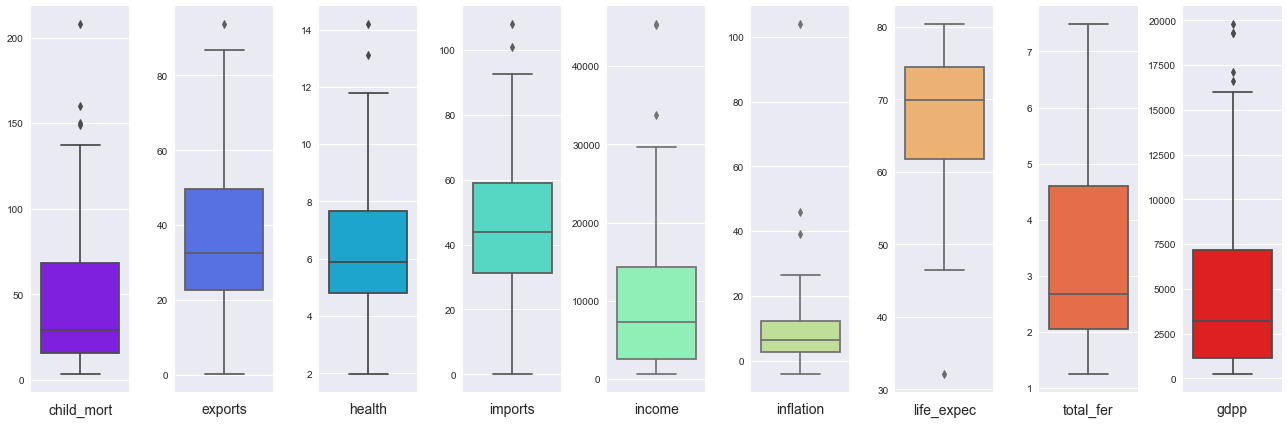

In [23]:
# Box Plot after dropping high gdpp countries

Box_Plotter(df_final)

In [24]:
## Check
print ('Number of countries before outlier treatment:', dfc.shape[0])
print ('Number of countries after outlier treatment (dropping countries with gdpp > 20k+):', df_final.shape[0])

Number of countries before outlier treatment: 167
Number of countries after outlier treatment (dropping countries with gdpp > 20k+): 132


<h2 style='color:black'> Step-4: Preparation for Modeling

<h3 style='color:black'> Step-4.1: Rescaling

In [25]:
# Reset index

df_final = df_final.reset_index(drop = True)
df_final.tail()

country  child_mort  exports  health  imports  income  inflation  \
127    Vanuatu        29.2     46.6    5.25     52.7    2950       2.62   
128  Venezuela        17.1     28.5    4.91     17.6   16500      45.90   
129    Vietnam        23.3     72.0    6.84     80.2    4490      12.10   
130      Yemen        56.3     30.0    5.18     34.4    4480      23.60   
131     Zambia        83.1     37.0    5.89     30.9    3280      14.00   

     life_expec  total_fer   gdpp  
127        63.0       3.50   2970  
128        75.4       2.47  13500  
129        73.1       1.95   1310  
130        67.5       4.67   1310  
131        52.0       5.40   1460

In [26]:
# Rescaling & convert to a dataframe
col_name = df_final.columns[1:]
df_final_2 = df_final[col_name]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final_scaled = scaler.fit_transform(df_final_2)

# Convert nparray into dataframe
df_final_scaled = pd.DataFrame(df_final_scaled)
df_final_scaled.columns = col_name
df_final_scaled.shape

(132, 9)

In [27]:
df_final_scaled.tail()

child_mort   exports    health   imports    income  inflation  \
127   -0.435273  0.496601 -0.443164  0.343077 -0.766068  -0.574403   
128   -0.730696 -0.420803 -0.588426 -1.458240  0.826873   3.254658   
129   -0.579322  1.784009  0.236147  1.754365 -0.585025   0.264310   
130    0.226376 -0.344775 -0.473071 -0.596071 -0.586201   1.281736   
131    0.880701  0.010022 -0.169731 -0.775690 -0.727273   0.432407   

     life_expec  total_fer      gdpp  
127   -0.609464   0.155635 -0.403278  
128    0.898807  -0.511668  1.824856  
129    0.619047  -0.848558 -0.754532  
130   -0.062107   0.913640 -0.754532  
131   -1.947446   1.386583 -0.722792

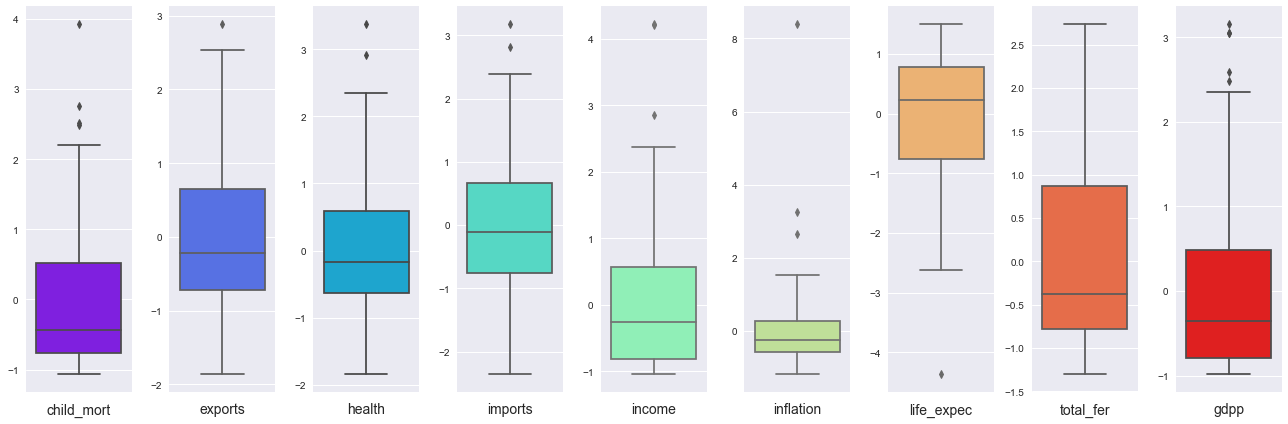

In [28]:
# Box Plot on scaled dataframe to check for discrepancies if any

def Box_Plotter_3 (df):
    plt.style.use('seaborn')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 14
    fig = plt.figure(figsize = (18,6))
    #fig.suptitle('Box Plots', fontsize=font1)
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, df.columns.shape[0])))
    for ii in enumerate(df.columns):
        ax1 = fig.add_subplot(1, 9, ii[0]+1)
        plt.subplot(ax1)
        sns.boxplot(data = df, y=[ii[1]], color=next(colors))
        plt.xlabel(ii[1], fontsize=font3)
    plt.tight_layout()
    plt.show()
    return

Box_Plotter_3(df_final_scaled)

<h4 style = 'color:blue'> Scaling is complete. Inflation has clear outlier value. This is for country Nigeria.

<h3 style='color:black'> Step-4.2: Hopkins Statistics

In [29]:
# Hopkins Statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
for i in range(1,11,1):
    print ('Check #', i,' Hopkins Stat', round(hopkins(df_final_scaled),3))

Check # 1  Hopkins Stat 0.795
Check # 2  Hopkins Stat 0.83
Check # 3  Hopkins Stat 0.796
Check # 4  Hopkins Stat 0.802
Check # 5  Hopkins Stat 0.823
Check # 6  Hopkins Stat 0.841
Check # 7  Hopkins Stat 0.83
Check # 8  Hopkins Stat 0.814
Check # 9  Hopkins Stat 0.782
Check # 10  Hopkins Stat 0.84


<h4 style = 'color:blue'> Hopkins Statistics is about 0.8

<h2 style='color:black'> Step-5: Clustering - KMeans Algorithm

<h3 style='color:black'> Step-5.1: Initial K

In [31]:
# Need to fix random_state to begin with otherwise everytime results will vary
r_state = 50

In [32]:
# KMeans - First Model
from sklearn.cluster import KMeans
kmeans_ini = KMeans(n_clusters=4, max_iter=100, random_state=r_state)
kmeans_ini.fit(df_final_scaled)
print(np.unique(kmeans_ini.labels_, return_counts=True))

(array([0, 1, 2, 3]), array([30, 36, 25, 41], dtype=int64))


<h3 style='color:black'> Step-5.2: Elbow, Silhouette Analysis

In [33]:
## Function to plot Elbow and Silhouette Curves
def Elbow_Sil_Plotter (df, k_ini, k_fin, niter=100):
    # Calculate SSD & Silhouette score in a single loop
    ssd_list = []
    sil_avg = []
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    for numK in range(k_ini, k_fin+1, 1):
        kmeans = KMeans (n_clusters = numK, max_iter= niter,random_state=r_state)
        kmeans.fit(df)
        ssd_list.append(kmeans.inertia_)
        sil_avg.append(silhouette_score(df,kmeans.labels_))
    
    # Plot Elbow & Silhouette Curves
    plt.style.use('seaborn')
    plt.figure(figsize=(18,12))

    plt.subplot(2,1,1)
    plt.plot(ssd_list, '-g')
    plt.title('Elbow Curve', fontsize=15) 
    plt.xticks(np.arange(len(range(k_ini, k_fin+1,1))), range(k_ini, k_fin+1,1))
    plt.xlabel('K')
    plt.ylabel('SSD')

    plt.subplot(2,1,2)
    plt.plot(sil_avg, '-r')
    plt.title('Silhouette Curve', fontsize=15) 
    plt.xticks(np.arange(len(range(k_ini, k_fin+1,1))), range(k_ini, k_fin+1,1))
    plt.xlabel('K')
    plt.ylabel('Silhouette Score')
    plt.show()

    return (ssd_list, sil_avg)

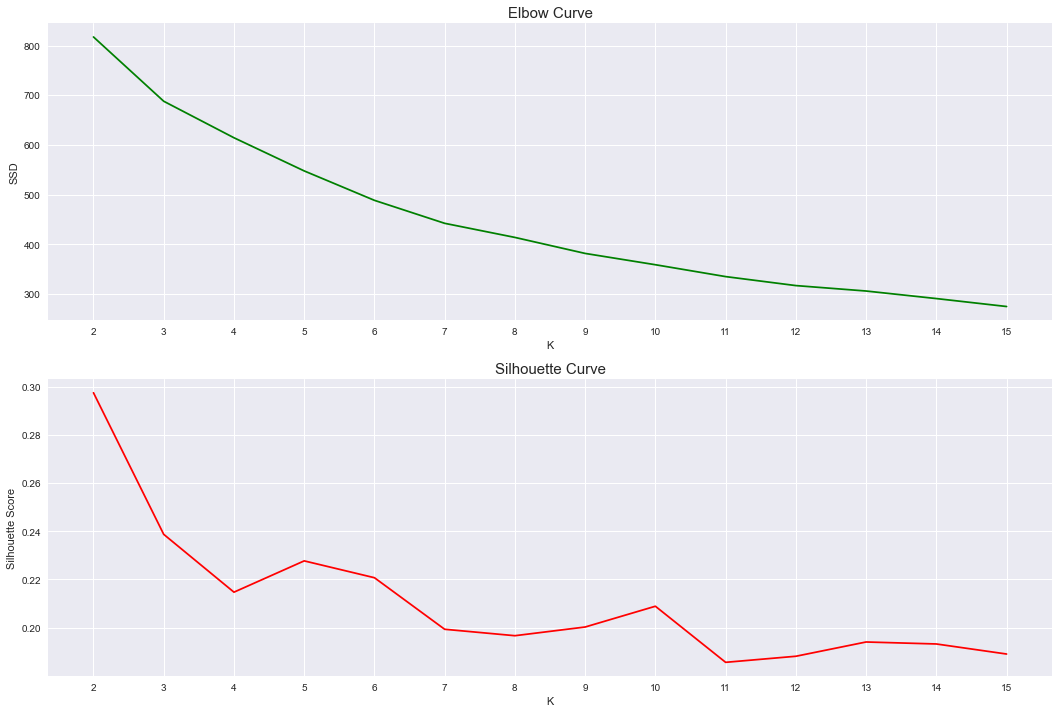

In [34]:
ElbowSSD, Sil_Score = Elbow_Sil_Plotter(df_final_scaled, 2,15)

<h4 style = 'color:blue'> Observation: Elbow curve shows a slope change at K value of 3, 6 and to some extent 7. Silhouette scores are higher for 5,6.

<h3 style='color:black'> Step-5.3: Iterations with different K

In [35]:
# Selected Columns for box plot & selected K
sel_cols = ['child_mort','gdpp']
sel_K = [3,5,6,7]

In [36]:
# Function to plot box
def Box_Plot_Analysis (df, sel_cols, cluster_col_name):
    plt.style.use('seaborn')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 14
    fig = plt.figure(figsize = (18,6))
    for ii in enumerate(sel_cols):
        ax1 = fig.add_subplot(1, 3, ii[0]+1)
        plt.subplot(ax1)
        sns.boxplot(data = df, y=ii[1], x=cluster_col_name)
        plt.xlabel(ii[1], fontsize=font3)
        KVal = df[cluster_col_name].nunique()
        title_str = 'K Value = ' + str(KVal)
        plt.title(title_str, fontsize=font1)
    plt.tight_layout()
    plt.show()
    return

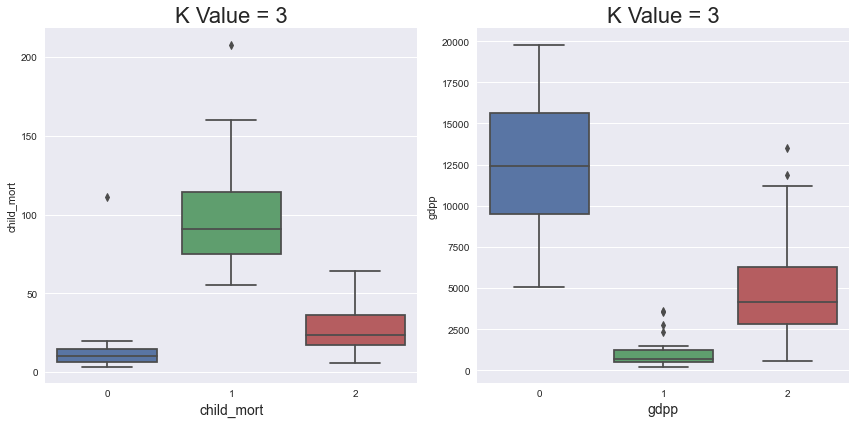

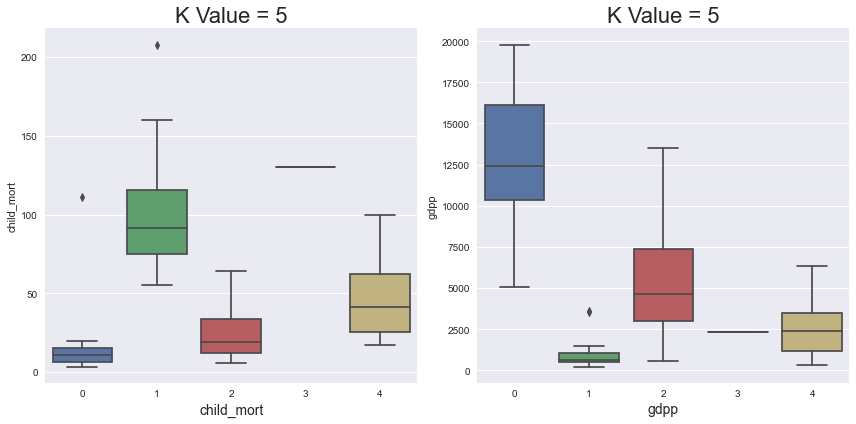

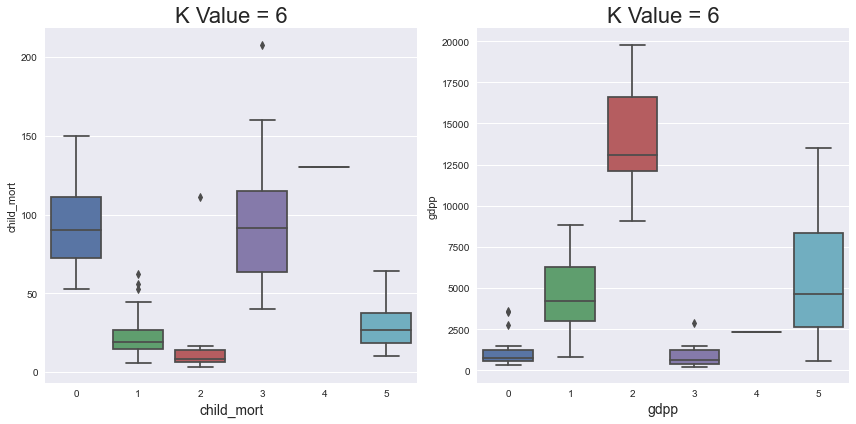

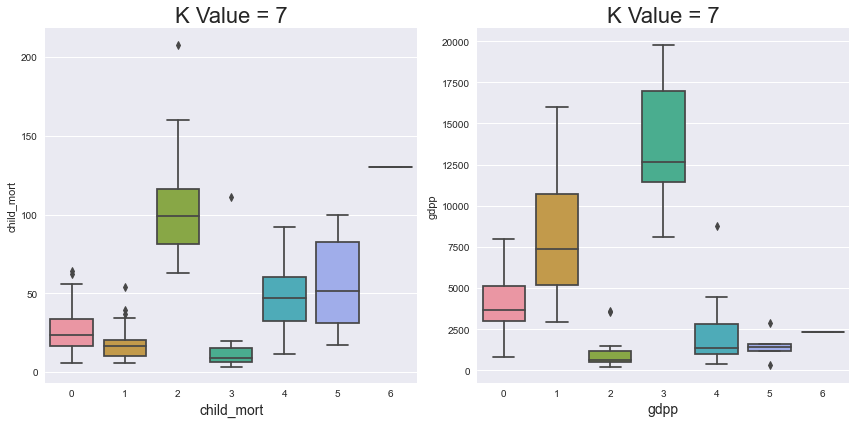

In [37]:
# Loop to plot box plots for each selected K
label_dict = {}
from sklearn.cluster import KMeans
for numK in sel_K:
    kmeans = KMeans(n_clusters=numK, max_iter=500, random_state=r_state)
    kmeans.fit(df_final_scaled)
    df_kmeans = df_final.copy(deep=True)
    df_kmeans['label'] = kmeans.labels_
    label_dict[numK] = kmeans.labels_
    Box_Plot_Analysis(df_kmeans, sel_cols, 'label')

<h3 style='color:black'> Step-5.4: Summary from KMeans

<h4 style = 'color:blue'> Observation: KMeans is doing a hard clustering, therefore the outliers in the data are influencing cluster formation.

<h4 style = 'color:blue'> Technical Summary of K value for KMeans Algorithm

- **K=3**: Elbow curve SSD has slope change, Sil score is ok. Technically not a great choice. 
- **K=5**: Elbow curve SSD has a slight slope change, however Sil score is better than K=3. Technically a good choice.
- **K=6**: Elbow curve SSD has a slight slope change, Sil score is lower than 5. Technically not a great choice.
- **K=7**: Elbow curve SSD has slope change, Sil score is lower than 5. Technically not a great choice.

<h4 style = 'color:blue'> Business Summary of K value for KMeans Algorithm

- **K=3**: Identifies low gdpp-low child_mort and high gdpp - low child_mort quite well. But puts all remaining in one cluster. Makes it dificult to diffrentiate. Though simple, not recommended.
- **K=5,6,7**: Looks quite ok. Better granuality in diffrentiation. Needs closer look to pick one amongst these.

In [38]:
#### Dataframe with KMEans Results
df_kmeans.drop(columns='label', inplace=True)
K_Business = [5,6,7]
for numK in K_Business:
    str1 = 'K=' + str(numK)
    df_kmeans[str1] = label_dict[numK]

In [39]:
print ('No. of screened countries K=5:', df_kmeans[(df_kmeans['K=5'] == 1) | (df_kmeans['K=5'] == 3)].shape[0])
print ('No. of screened countries K=6:', df_kmeans[(df_kmeans['K=6'] == 0) | (df_kmeans['K=6'] == 3) | (df_kmeans['K=6'] == 4)].shape[0])
print ('No. of screened countries K=7:', df_kmeans[(df_kmeans['K=7'] == 2) | (df_kmeans['K=7'] == 6) | (df_kmeans['K=7'] == 5)].shape[0])

No. of screened countries K=5: 35
No. of screened countries K=6: 43
No. of screened countries K=7: 37


<h4 style = 'color:blue'> KMeans with K=5, cluster labels 1 & 3 . A few countries from other labels might also be in the need of funding.

<h2 style='color:black'> Step-6: Clustering - Hierarchical Algorithm

<h3 style='color:black'> Step-6.1: Single & Complete Linkages

In [40]:
# Import libraries

from scipy.cluster.hierarchy import  linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [41]:
# We will use the dataframe after removing countries above 20k gdpp
df_final_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.054048 -1.358481  0.552305 -0.057216 -0.923598   0.028975   -1.436580   
1   -0.742903 -0.446146  0.112248  0.132667  0.054503  -0.408960    1.008278   
2   -0.481662  0.080982 -0.904584 -0.750030  0.403656   0.618198    1.032605   
3    1.757203  1.292361 -1.468540 -0.159855 -0.419265   1.175570   -0.962205   
4   -0.896718  0.440847 -0.109917  0.661258  1.132530  -0.678799    1.069096   

   total_fer      gdpp  
0   1.658687 -0.914712  
1  -1.042919 -0.166288  
2  -0.239564 -0.087996  
3   1.878961 -0.284783  
4  -0.731942  1.549777

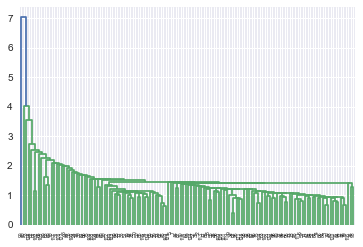

In [42]:
# Single Linkage
single_merge = linkage(df_final_scaled, method='single', metric='euclidean')
dendrogram(single_merge)
plt.show()

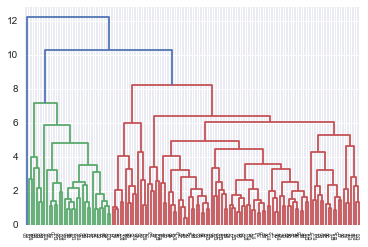

In [43]:
# Complete Linkage
complete_merge = linkage(df_final_scaled, method='complete', metric='euclidean')
dendrogram(complete_merge)
plt.show()

<h4 style = 'color:blue'> Observation: Complete linkage Hierarchical clustering is showing good results. K can be 4, 5, 7, 9

<h3 style='color:black'> Step-6.2: Iterations with different K

In [44]:
# Selected Columns for box plot & selected K
sel_cols = ['child_mort','gdpp']
sel_K = [4,5,7,9]

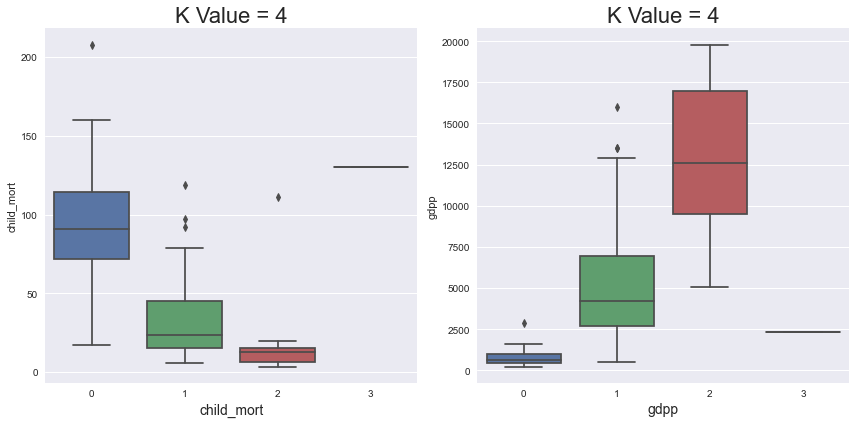

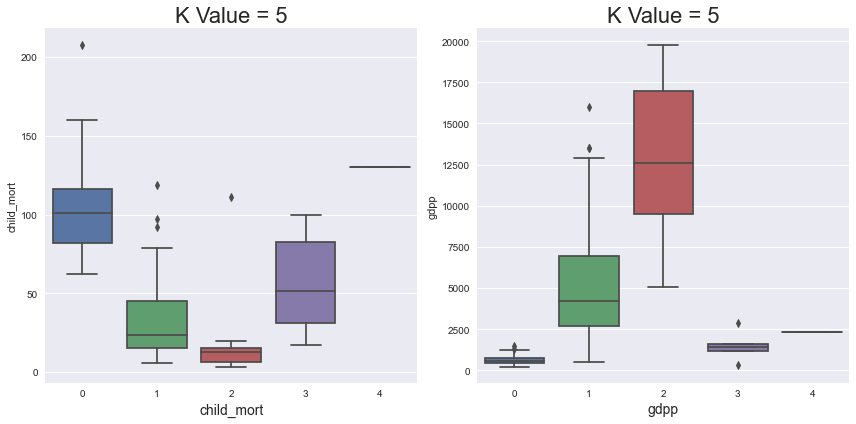

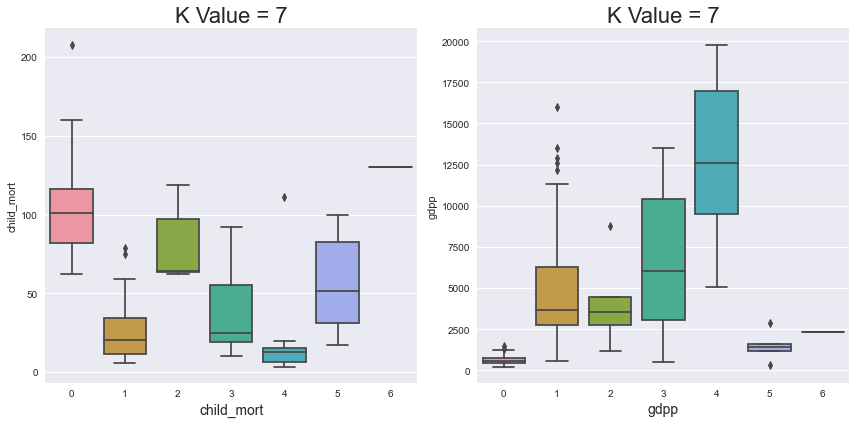

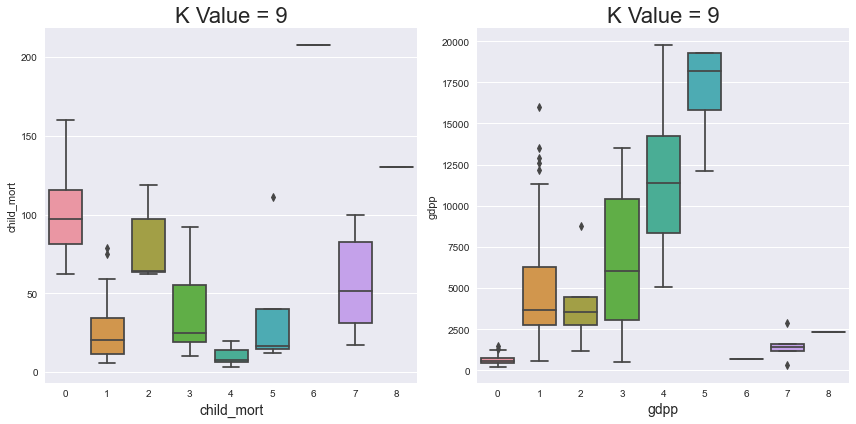

In [45]:
# Loop to plot box plots for each selected K
label_dict_h = {}
for numK in sel_K:
    cluster_label_HC = cut_tree(complete_merge, n_clusters=numK).reshape(-1,)
    df_HC = df_final.copy(deep=True)
    df_HC['label'] = cluster_label_HC
    label_dict_h[numK] = cluster_label_HC
    Box_Plot_Analysis(df_HC, sel_cols, 'label')

<h3 style='color:black'> Step-6.3: Summary from Hierarchical Clustering

<h4 style = 'color:blue'> Observation: On this problem, Hierarchical clustering seems to generate comprehendible & logical clusters compared to KMeans. 

<h4 style = 'color:blue'> Technical Summary for Hierarchical clustering.

- **Linkage**: Complete linkage gives better results than single linkage. This is consistent with most other datasets.
- **Extreme Datapoints**: With K>=5, the countries with high child_mort, low gdpp etc are clearly standing out from the rest.

<h4 style = 'color:blue'> Business Summary of K value for KMeans Algorithm

- **K=4**: Identifies high gdpp countries quite well. But puts most of the countries in need of funds in a single cluster. Makes it dificult to diffrentiate. Though simple, not recommended.
- **K=9**: Too many clusters. Not simple, not recommended.
- **K=5,7**: Looks quite ok. Better granuality in diffrentiation. Needs closer look to pick one amongst these.

In [46]:
#### Lets inspect the countries classified as high child_mort and low gdpp to begin with
df_HC.drop(columns='label', inplace=True)
K_Business = [4,5,7,9]
for numK in K_Business:
    str1 = 'K=' + str(numK)
    df_HC[str1] = label_dict_h[numK]

In [47]:
print ('No. of screened countries K=4:', df_HC[(df_HC['K=4'] == 0) | (df_HC['K=4'] == 3)].shape[0])
print ('No. of screened countries K=5:', df_HC[(df_HC['K=5'] == 0) | (df_HC['K=5'] == 3) | (df_HC['K=5'] == 4)].shape[0])
print ('No. of screened countries K=7:', df_HC[(df_HC['K=7'] == 0) | (df_HC['K=7'] == 5) | (df_HC['K=7'] == 6)].shape[0])
print ('No. of screened countries K=9:', df_HC[(df_HC['K=9'] == 0) | (df_HC['K=9'] == 6) | (df_HC['K=9'] == 7) | (df_HC['K=9'] == 8)].shape[0])

No. of screened countries K=4: 34
No. of screened countries K=5: 34
No. of screened countries K=7: 34
No. of screened countries K=9: 34


<h4 style = 'color:blue'> Hierarchical with K=5, cluster labels 0, 3 & 4. A few countries from other labels might also be in the need of funding.

<h2 style='color:black'> Step-7: Analyse the clusters

<h3 style='color:black'> Step-7.1: Consolidation

In [48]:
# Cluster labels applied to a consolidated DF

df_clustered = df_final.copy(deep=True)
df_clustered['KM_K5'] = df_kmeans['K=5'].copy(deep=True)
df_clustered['HC_K5'] = df_HC['K=5'].copy(deep=True)
df_clustered.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  KM_K5  HC_K5  
0       9.44        56.2       5.82    553      1      0  
1       4.49        76.3       1.65   4090      2      1  
2      16.10        76.5       2.89   4460      2      1  
3      22.40        60.1       6.16   3530      1      1  
4       1.44        76.8       2.13  12200      0      1

In [49]:
# Countries which are not clustered - Developed countries with gdpp > 20k

df_not_clustered = dfc[(dfc.gdpp_bin == '20k+')].copy(deep=True)

In [50]:
# Check

print ('Countries in clustered DF', df_clustered.shape[0])
print ('Countries in not clustered DF (developed countries with gdpp > 20k)', df_not_clustered.shape[0])
print ('Total no. of countries', dfc.shape[0])

Countries in clustered DF 132
Countries in not clustered DF (developed countries with gdpp > 20k) 35
Total no. of countries 167


<h4 style = 'color:blue'> We will use results from Hierarchical clustering for further analysis and KMeans is retained only for additional verification.

<h3 style='color:black'> Step-7.2: Cluster Profiling

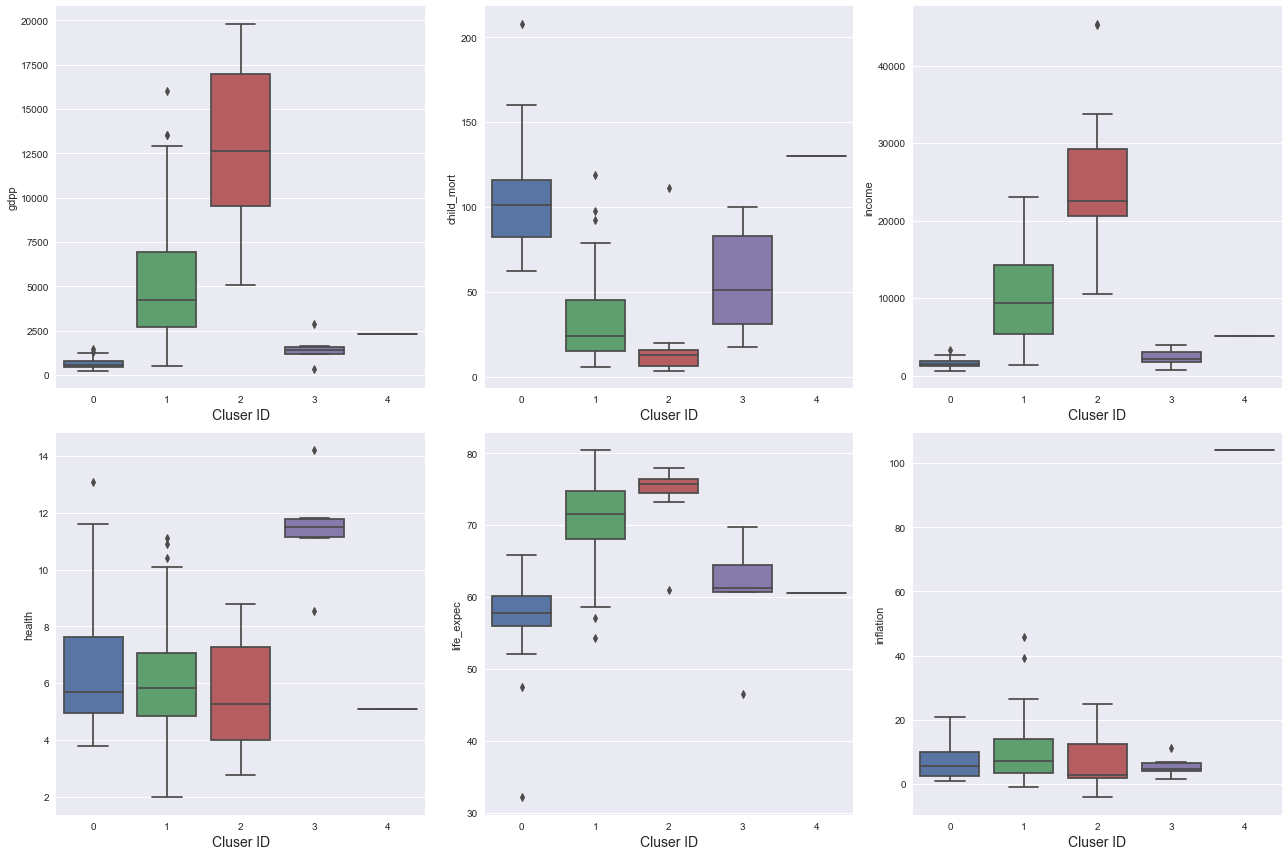

In [51]:
# Box Plot with clusters from Hierarchical clustering
sel_cols = ['gdpp','child_mort','income','health','life_expec','inflation']
plt.style.use('seaborn')
%matplotlib inline
font1 = 22
font2 = 18
font3 = 14
fig = plt.figure(figsize = (18,12))
for ii in enumerate(sel_cols):
    ax1 = fig.add_subplot(2, 3, ii[0]+1)
    plt.subplot(ax1)
    sns.boxplot(data = df_clustered, y=ii[1], x='HC_K5')
    plt.xlabel('Cluser ID', fontsize=font3)
plt.tight_layout()
plt.show()

<h4 style = 'color:blue'> Hierarchichal clustering

`Under Developed Countries in need of Help`
- **Cluser 0**: low gdpp - high child_mort - low income - moderate health spend - low life_expec - moderate inflation
- **Cluser 3**: low gdpp - medium child_mort - low income - high health spend - low life_expec - low inflation
- **Cluser 4**: low moderate gdpp - high child_mort - low moderate income - low health spend - low life_expec - high inflation

`Developed Countries not in need of Help`
- **Cluser 1**: moderate gdpp - low to moderate child_mort - moderate income - moderate health spend - high life_expec - moderate inflation
- **Cluser 2**: high gdpp - low child_mort - high income - moderate health spend - high life_expec - low inflation

<h4 style = 'color:blue'> Recognised and differentiated the clusters based on under developed or developed countries.

<h3 style='color:black'> Step-7.3: Identify countries in dire need of aid

On the clusters 0,3,4 from Hierarchical Clustering: We will use 2 methods to come to list of 5 countries in direst need of aid.
- **Ratio of Child Mortality to Income** Sort in descending order. Countries with highest child mortality and lowest per person income will come out on the top.
-  **Sort in descending order of child_mort & ascending order of gdpp, income.** But before that use a cut off on income of lets say 1500. Assume cutoff on gdpp = half the cut off on income.

In [52]:
# Dataframe to identify countries in dire need of aid

df_ranker_HC = df_clustered[(df_clustered['HC_K5'] == 0) 
                         | (df_clustered['HC_K5'] == 3) 
                         | (df_clustered['HC_K5'] == 4)].copy(deep=True)

In [53]:
# Method-1: Child Mortality to Income Index
df_ranker_HC['child_mort_div_by_income'] = df_ranker_HC.child_mort / df_ranker_HC.income
df_ranker_HC.sort_values(by='child_mort_div_by_income', ascending = False).head(5)

country  child_mort  exports  health  imports  income  \
30           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   
24   Central African Republic       149.0     11.8    3.98     26.5     888   
89                      Niger       123.0     22.2    5.16     49.1     814   
53                      Haiti       208.0     15.3    6.91     64.7    1500   
106              Sierra Leone       160.0     16.8   13.10     34.5    1220   

     inflation  life_expec  total_fer  gdpp  KM_K5  HC_K5  \
30       20.80        57.5       6.54   334      1      0   
24        2.01        47.5       5.21   446      1      0   
89        2.55        58.8       7.49   348      1      0   
53        5.45        32.1       3.33   662      1      0   
106      17.20        55.0       5.20   399      1      0   

     child_mort_div_by_income  
30                   0.190476  
24                   0.167793  
89                   0.151106  
53                   0.138667  
106                  0.131148

In [54]:
# Method-2: Sorting Logic
cut_off = 1500
df_ranker_HC[(df_ranker_HC.gdpp <= cut_off*0.5) & (df_ranker_HC.income <= cut_off)].sort_values(
    by=['child_mort','gdpp','income'], ascending = [False,True,True]).head(5)

country  child_mort  exports  health  imports  income  \
53                      Haiti       208.0     15.3    6.91     64.7    1500   
106              Sierra Leone       160.0     16.8   13.10     34.5    1220   
24   Central African Republic       149.0     11.8    3.98     26.5     888   
89                      Niger       123.0     22.2    5.16     49.1     814   
30           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   

     inflation  life_expec  total_fer  gdpp  KM_K5  HC_K5  \
53        5.45        32.1       3.33   662      1      0   
106      17.20        55.0       5.20   399      1      0   
24        2.01        47.5       5.21   446      1      0   
89        2.55        58.8       7.49   348      1      0   
30       20.80        57.5       6.54   334      1      0   

     child_mort_div_by_income  
53                   0.138667  
106                  0.131148  
24                   0.167793  
89                   0.151106  
30                   0.190476

<h3 style = 'color:blue'> For both the methods, the result is the same set of 5 countries.

On the clusters 1,3 KMeans: We will use the same 2 methods to come to list of 5 countries in direst need of aid.
- **Ratio of Child Mortality to Income** Sort in descending order. Countries with highest child mortality and lowest per person income will come out on the top.
-  **Sort in descending order of child_mort & ascending order of gdpp, income.** But before that use a cut off on income of lets say 1500. Assume cutoff on gdpp = half the cut off on income.

In [55]:
# Dataframe to identify countries in dire need of aid

df_ranker_KM = df_clustered[(df_clustered['KM_K5'] == 1) 
                         | (df_clustered['KM_K5'] == 3)].copy(deep=True)

In [56]:
# Method-1: Child Mortality to Income Index
df_ranker_KM['child_mort_div_by_income'] = df_ranker_KM.child_mort / df_ranker_KM.income
df_ranker_KM.sort_values(by='child_mort_div_by_income', ascending = False).head(5)

country  child_mort  exports  health  imports  income  \
30           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   
24   Central African Republic       149.0     11.8    3.98     26.5     888   
89                      Niger       123.0     22.2    5.16     49.1     814   
53                      Haiti       208.0     15.3    6.91     64.7    1500   
106              Sierra Leone       160.0     16.8   13.10     34.5    1220   

     inflation  life_expec  total_fer  gdpp  KM_K5  HC_K5  \
30       20.80        57.5       6.54   334      1      0   
24        2.01        47.5       5.21   446      1      0   
89        2.55        58.8       7.49   348      1      0   
53        5.45        32.1       3.33   662      1      0   
106      17.20        55.0       5.20   399      1      0   

     child_mort_div_by_income  
30                   0.190476  
24                   0.167793  
89                   0.151106  
53                   0.138667  
106                  0.131148

In [57]:
# Method-2: Sorting Logic

cut_off = 1500
df_ranker_KM[(df_ranker_KM.gdpp <= cut_off*0.5) & (df_ranker_KM.income <= cut_off)].sort_values(
    by=['child_mort','gdpp','income'], ascending = [False,True,True]).head(5)

country  child_mort  exports  health  imports  income  \
53                      Haiti       208.0     15.3    6.91     64.7    1500   
106              Sierra Leone       160.0     16.8   13.10     34.5    1220   
24   Central African Republic       149.0     11.8    3.98     26.5     888   
89                      Niger       123.0     22.2    5.16     49.1     814   
30           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   

     inflation  life_expec  total_fer  gdpp  KM_K5  HC_K5  \
53        5.45        32.1       3.33   662      1      0   
106      17.20        55.0       5.20   399      1      0   
24        2.01        47.5       5.21   446      1      0   
89        2.55        58.8       7.49   348      1      0   
30       20.80        57.5       6.54   334      1      0   

     child_mort_div_by_income  
53                   0.138667  
106                  0.131148  
24                   0.167793  
89                   0.151106  
30                   0.190476

<h3 style = 'color:blue'> Five Countries in direst need of aid acc to Hierarchical Clustering

- **Haiti**
- **Sierra Leone**
- **Central African Republic**
- **Niger**
- **Congo, Dem. Rep.**

<h3 style = 'color:blue'> Five Countries in direst need of aid acc to KMeans Clustering

- **Haiti**
- **Sierra Leone**
- **Central African Republic**
- **Niger**
- **Congo, Dem. Rep.**

In [58]:
# List to store countries in need of dire aid, so the downstream activities are easier.
# Both methods and both algorithms give same result. So lets pick Hierarchical clustering with method-1 of selecting 5 countries

c_dire_need = list(df_ranker_HC.sort_values(by='child_mort_div_by_income', ascending = False).head(5).country)
c_dire_need

['Congo, Dem. Rep.',
 'Central African Republic',
 'Niger',
 'Haiti',
 'Sierra Leone']

<h2 style='color:black'> Step-8: Visualisations of the clusters

<h3 style = 'color:blue'> Observation: Box Plots are already done during cluster profiling.

Lets do scatter plots with plotly express to understand the clusters formed.

In [59]:
# Code block to move countries in direst need to cluster 5 and countries above 20k gdpp to cluster 6

dfc_cluster_viz = dfc.copy(deep=True)
c_20kplus_gbpp = list(dfc[dfc.gdpp_bin == '20k+'].country)

for in_val in dfc_cluster_viz.index:
    if dfc_cluster_viz.iloc[in_val,0] in c_dire_need:
        dfc_cluster_viz.loc[in_val,'Cluster_ID'] = 5
    elif dfc_cluster_viz.iloc[in_val,0] in c_20kplus_gbpp:
        dfc_cluster_viz.loc[in_val,'Cluster_ID'] = 6
    else:
        dfc_cluster_viz.loc[in_val,'Cluster_ID'] = list(df_clustered[df_clustered.country == dfc_cluster_viz.iloc[in_val,0]].HC_K5)[0]

dfc_cluster_viz.Cluster_ID = dfc_cluster_viz.Cluster_ID.astype(int)
dfc_cluster_viz.drop(columns = 'gdpp_bin', inplace=True)

In [60]:
# Code block to give string names to cluster for visualization

def cluster_str (val):
    if val == 0 or val == 3 or val == 4:
        return 'Under Developed (0,3,4)'
    elif val == 1:
        return 'Moderately Developed (1)'
    elif val == 2 or val == 6:
        return 'Developed (2, gdpp 20k+)'
    elif val == 5:
        return 'Direst Need'
dfc_cluster_viz["Cluster_Str"] = dfc_cluster_viz["Cluster_ID"].apply(cluster_str)

In [61]:
# gdpp vs. child_mort

fig = px.scatter(dfc_cluster_viz,
                 x='gdpp',y='child_mort',
                 color='Cluster_Str',hover_name="country", log_y = True, log_x=True, 
                 title='gdpp vs child_mort on log scale')

fig.update_traces(marker=dict(size=12, line=dict(width=1,color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()

In [62]:
# gdpp vs. income

fig = px.scatter(dfc_cluster_viz,
                 x='gdpp',y='income',
                 color='Cluster_Str',hover_name="country", log_y = True, log_x=True, 
                 title='gdpp vs income on log scale')

fig.update_traces(marker=dict(size=12, line=dict(width=1,color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()

In [63]:
# income vs. child_mort

fig = px.scatter(dfc_cluster_viz,
                 x='income',y='child_mort',
                 color='Cluster_Str',hover_name="country", log_y = True, log_x=True, 
                 title='income vs child_mort on log scale')

fig.update_traces(marker=dict(size=12, line=dict(width=1,color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()

<h2 style='color:black'> Step-9: Conclusion & Recommendation

<h3 style = 'color:green'> EDA Insights

- **Insight-1** Countries with GDP below 20000 are struggling with low life expectancy, high child mortality.
- **Insight-2** Child_mortality can detect the overall health and life_expectancy of countries.¶

<h3 style = 'color:green'> KMeans and Hierarchichal Clustering are show nearly similar results with number of clusters = 5

<h3 style = 'color:red'> 5 Countries in direst need of aid (same for both KMeans and Heirarchical Clustering)

- **Haiti**
- **Sierra Leone**
- **Central African Republic**
- **Niger**
- **Congo, Dem. Rep.**

In [64]:
dfc_cluster_viz[dfc_cluster_viz.Cluster_ID == 5]

country  child_mort  exports  health  imports  income  \
31   Central African Republic       149.0     11.8    3.98     26.5     888   
37           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   
66                      Haiti       208.0     15.3    6.91     64.7    1500   
112                     Niger       123.0     22.2    5.16     49.1     814   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   

     inflation  life_expec  total_fer  gdpp  Cluster_ID  Cluster_Str  
31        2.01        47.5       5.21   446           5  Direst Need  
37       20.80        57.5       6.54   334           5  Direst Need  
66        5.45        32.1       3.33   662           5  Direst Need  
112       2.55        58.8       7.49   348           5  Direst Need  
132      17.20        55.0       5.20   399           5  Direst Need

<h3 style = 'color:brown'> 10 Other Countries in DIRE need of aid:

In [67]:
dfc_cluster_viz[dfc_cluster_viz.Cluster_Str == 'Under Developed (0,3,4)'].sort_values(by=['gdpp','child_mort','income'], 
                                                                                      ascending = [True,False,True]).head(10)

country  child_mort  exports  health  imports  income  inflation  \
26         Burundi        93.6     8.92   11.60     39.2     764      12.30   
88         Liberia        89.3    19.10   11.80     92.6     700       5.47   
93      Madagascar        62.2    25.00    3.77     43.0    1390       8.79   
106     Mozambique       101.0    31.50    5.21     46.2     918       7.64   
94          Malawi        90.5    22.80    6.59     34.9    1030      12.10   
150           Togo        90.3    40.20    7.65     57.3    1210       1.18   
64   Guinea-Bissau       114.0    14.90    8.50     35.2    1390       2.97   
0      Afghanistan        90.2    10.00    7.58     44.9    1610       9.44   
56          Gambia        80.3    23.80    5.69     42.7    1660       4.30   
126         Rwanda        63.6    12.00   10.50     30.0    1350       2.61   

     life_expec  total_fer  gdpp Cluster_ID              Cluster_Str  
26         57.7       6.26   231          0  Under Developed (0,3,4)  
88         60.8       5.02   327          3  Under Developed (0,3,4)  
93         60.8       4.60   413          0  Under Developed (0,3,4)  
106        54.5       5.56   419          0  Under Developed (0,3,4)  
94         53.1       5.31   459          0  Under Developed (0,3,4)  
150        58.7       4.87   488          0  Under Developed (0,3,4)  
64         55.6       5.05   547          0  Under Developed (0,3,4)  
0          56.2       5.82   553          0  Under Developed (0,3,4)  
56         65.5       5.71   562          0  Under Developed (0,3,4)  
126        64.6       4.51   563          0  Under Developed (0,3,4)

In [66]:
# To sum up, lets plot choropleth to vizualize the clusters formed

dfc_cluster_viz.Cluster_ID = dfc_cluster_viz.Cluster_ID.astype(str)

fig = px.choropleth(title = 'Result of Clustering: Cluster_ID sorted with countries needing HELP first', data_frame = dfc_cluster_viz, 
              locations = 'country', locationmode = 'country names',
              hover_data = ['country', 'child_mort'], projection = 'equirectangular',
             color = 'Cluster_ID', category_orders = {'Cluster_ID': ['5', '0', '3', '4', '1', '2', '6']},
                    color_discrete_map={'5':'red', 
                                        '0':'darkmagenta', 
                                        '3':'deeppink',
                                        '4':'orange', 
                                        '1':'palegreen',
                                        '2':'limegreen', 
                                        '6':'Green'})
fig.show()

`Submission Harish Dave`